# 여러 종목 가격을 한번에
요약
- 리스트컴프리핸션을 잘 사용하면 다수의 종목을 한번에 조회하고 결과를 취합할 수 있습니다.
- pd.concat(df_list, axis=1)을 사용하여 다수의 컬럼을 결합할 수 있습니다.
- df.plot()의 secondary_y 옵션을 사용하면 서로 다른 범위의 데이터를 비교하기 용이합니다.
- 첫번째 행으로 모든 행을 나누어주는 간단한 방법으로 기간 수익률을 손쉽게 구할 수 있습니다.


> 한글 폰트 설치, matplotlib 설정

In [31]:
import matplotlib.pyplot as plt

#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

['NanumGothic']


In [39]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

[]

In [32]:
# matplotlib rebuild
import matplotlib as mpl
mpl.font_manager._rebuild()

# matplotlib 환경설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## 한 종목의 가격 가져오기

In [33]:
import FinanceDataReader as fdr

# KB금융(105560)
df = fdr.DataReader('105560','2019-01-01','2019-12-31')
df.head(15)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,46700,46900,45600,45950,636199,-0.011828
2019-01-03,46600,46800,46200,46450,1275976,0.010881
2019-01-04,46500,46600,45600,45650,784105,-0.017223
2019-01-07,45800,46650,45450,45450,957133,-0.004381
2019-01-08,45900,45950,45300,45500,868450,0.001100
2019-01-09,46050,46650,45800,46450,885435,0.020879
2019-01-10,46500,46500,45500,45500,1195029,-0.020452
2019-01-11,45550,46100,45150,45350,1077396,-0.003297
2019-01-14,45450,45850,44400,44550,1189035,-0.017641


## 여러 종목의 종가(Close)가져오기
다수 종목의 데이터를 가져와 개별 종목의 종가를 pd.concat()로 합칩니다.

In [34]:
stock_list =[
    ["삼성전자","005930"],
    ["SK하이닉스","000660"],
    ["현대차","005380"],
    ["셀트리온","068270"],
    ["LG화학","051910"],
    ["POSCO","005490"],
    ["삼성물산","028260"],
    ["NAVER","035420"],
]

In [35]:
import pandas as pd

In [36]:
df_list = [fdr.DataReader(code, '2019-01-01','2019-12-31')['Close'] for name, code in stock_list]
len(df_list)

8

In [37]:
#pd.concat()로 합치기
df = pd.concat(df_list, axis = 1)
df.columns = [name for name, code in stock_list]
df.head(10)

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2019-01-02,38750,60600,114000,201193,337000,237000,104000,118000
2019-01-03,37600,57700,116500,197441,328000,237000,104500,122000
2019-01-04,37450,58300,119500,206352,330500,239000,107000,125500
2019-01-07,38750,58700,120500,202599,343000,246000,108000,131500
2019-01-08,38100,59200,119500,200254,349500,245500,107000,130000
2019-01-09,39600,63600,123000,200724,352000,255500,109000,133000
2019-01-10,39800,65300,123000,203069,347000,258500,108500,131000
2019-01-11,40500,65100,123000,203069,349000,255500,109000,131000
2019-01-14,40050,62100,121500,197910,350500,250000,109500,127000


<AxesSubplot:xlabel='Date'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from c

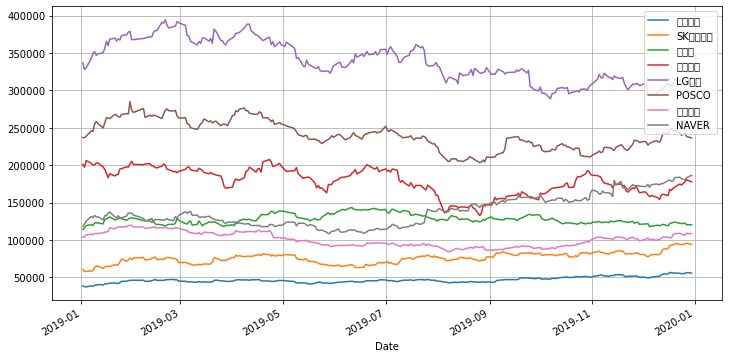

In [40]:
df.plot()

```
다수의 종목을 한번에 차트로 그려낼 수 있습니다.
하지만 종목간의 비교를 하기 쉽지 않다. 2개 종목만 그려보기
```

<AxesSubplot:xlabel='Date'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from c

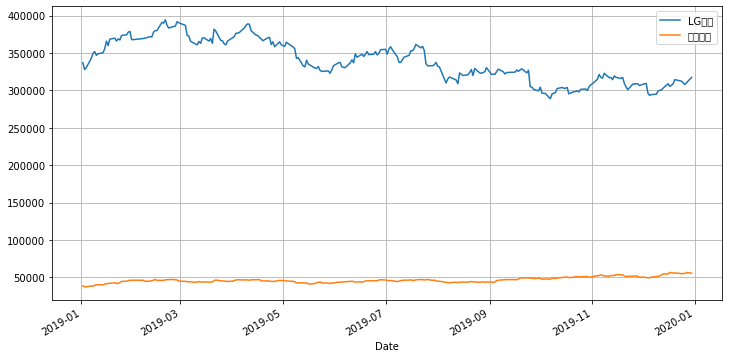

In [30]:
df[["LG화학","삼성전자"]].plot()

<AxesSubplot:xlabel='Date'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from c

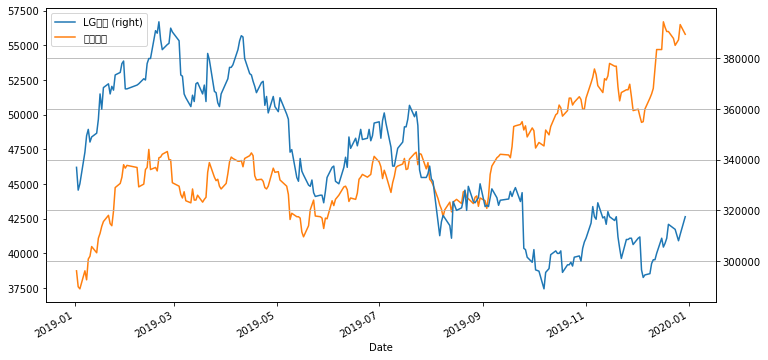

In [41]:
df[["LG화학","삼성전자"]].plot(secondary_y=["LG화학"])

```
두 개의 종목('LG화학','삼성전저')이 서로 다른 행보를 가지는 것은 보이지만 시작점이 다르기 때문에 시간에 따른 변활르 보기 쉽지 않습니다.

시작점을 0으로 동일하게 맞추고 시간에 따른 수익률을 보기 위해 첫 번째 행(row)으로 모든 행(row)을 나누고 1.0을 빼줍니다.
```

<AxesSubplot:xlabel='Date'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from c

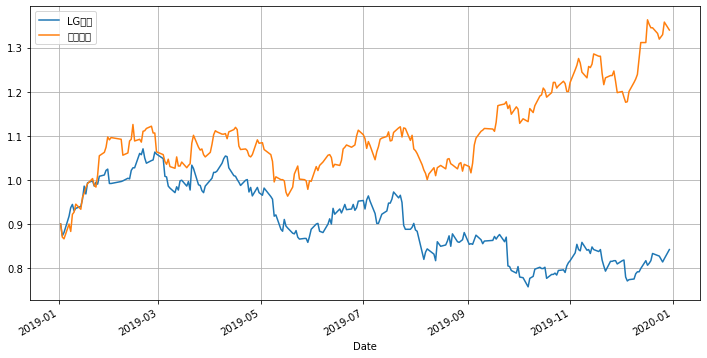

In [43]:
df2 = df[["LG화학","삼성전자"]]

df_plot = df2/df2.iloc[0]-0.1
df_plot.plot()

## 개별 종목의 2019년 수익률 비교

전체 종목의 성과(Performacne)를 시각화 해봅ㄴ다.

<AxesSubplot:xlabel='Date'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from c

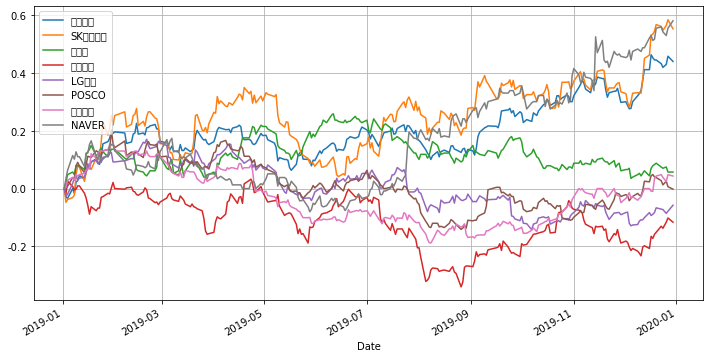

In [44]:
df_norm=df/df.iloc[0]-1
df_norm.plot()

수익률이 큰 종목부터 순으로 나열해 봅니다. 가장 마지막날(2019-12-30)의 수익률을 확인해 봅니다.

In [45]:
df_norm.iloc[-1].sort_values(ascending=False)

NAVER     0.580508
SK하이닉스    0.552805
삼성전자      0.440000
현대차       0.057018
삼성물산      0.043269
POSCO    -0.002110
LG화학     -0.057864
셀트리온     -0.116550
Name: 2019-12-30 00:00:00, dtype: float64

2019년 가장 좋은 수익률은 NAVER 58.0%, SK하이닉스 55.2% 이며 
반대로 LG화학과 셀트리온이 각각 -5,7%, -11.6%를 년 수익률을 기록했습니다.

이처럼, FinanceDataReader와 pandas의 몇가지 기능을 활용하면 
손쉽게 다수 종목에 대한 기간 수익률 비교가 가능합니다.

# 수정주가(Adjusted Price)

```
- 요약¶
수정주가(Adjusted Price)란 총 발행 주식수의 변화를 반영한 가격입니다
백테스트나 수익률 분석을 위해서는 수정주가를 사용합니다
FinanceDataReader 모든 가격을 수정가격(Adjusted Price)로 제공합니다

- 수정주가(Adjusted Price) 개요
수정주가(Adjusted Price)란 총 발행 주식수의 변화를 반영한 가격을 말합니다. 액면분할, 액면병합, 유상증자, 무상증자와 같이 총 발행주식수의 변화가 발생하면 가격의 변화가 생깁니다. 예를 들어, 어떤 회사가 액면분할을 통해 1주를 2개로 쪼갠다고 하면, 주식수를 2배로 늘어나고 주식의 가격은 1/2로 낮아지며 시가총액은 동일하게 유지 됩니다.

- 삼성전자 액면분할
실제 예를 들어보죠.

2018년 5월 4일, 삼성전자는 50:1로 액면분할을 합니다. 1주가 50주로 쪼개지는 것이죠.

액면분할을 위해 2018-04-30 부터 2018-05-03 까지 3일간 거래정지되고 2018-05-04 부터 액면분할된 가격으로 거래가 시작된 것을 확인할 수 있습니다.

이때 5000원인 삼성전자 주식 액면가는 액면분할 후 100원이 되었습니다. 액면분할 전에 주당 265만원(4월30일 기준)에서 5만3천원이 되었습니다.

위 표에는 표시되어 있지 않지만 2018-05-03일 총 주식수 128,386,494주에서 다음날 총 주식수는 6,419,324,700주 로 50배가 늘어났습니다. 즉 50:1로 액면분할을 한 것이죠.

만일 이 가격 데이터를 수정하지 않고 그대로 사용한다면 주가가 하루만에 1/50로 다시말해 -98% 하락한 것이 됩니다.

백테스트를 하기 위해서는 주식 가격 데이터의 연속성이 보장되어야 합니다. 가격의 연속성을 보장하기 위해서는 반드시 발행 주식수를 변화를 함께 고려해야 합니다. 발행주식수의 변화를 반영한 가격을 수정주가(Adjusted Price)라고 합니다.

수정가격은 보통 오늘 가격과 총 주식수를 과거 데이터에 반영하여 구합니다. 혹은 특정 테스트 범위의 가장 마지막 날의 가격과 총 주식수를 기준으로 과거 가격들을 수정합니다.

주가는 보통 종가(Close)를 기준으로 하기 때문에 수정주가로 가장 많이 쓰이는 것이 바로 수정 종가(Adjust Close Price) 입니다.
```

## FinanceDataReader와 수정주가

In [48]:
df = fdr.DataReader('005930','2018-04-25','2018-05-31')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-25,49220,50500,49220,50400,332292,-0.001189
2018-04-26,50420,52160,50400,52140,360931,0.034524
2018-04-27,53380,53639,52440,53000,606216,0.016494
2018-04-30,0,0,0,53000,0,0.000000
2018-05-02,0,0,0,53000,0,0.000000
2018-05-03,0,0,0,53000,0,0.000000
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319


FinanceDataReader 에서 제공되는 데이터는 액면분할(2018-05-04) 이전의 가격 역시 5만원대 입니다.

다음 2018년 1년간 차트에서도 액면분할의 영향을 받지 않고, 현재 시점기준의 수정주가(Adjusted Price)임을 확인할 수 있습니다.

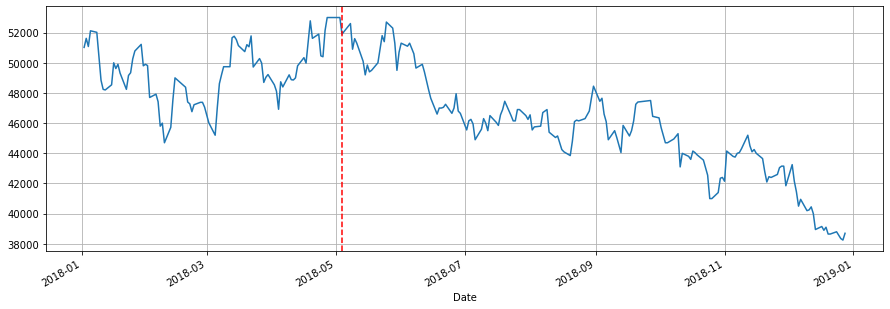

In [51]:
df = fdr.DataReader('005930','2018-01-01','2018-12-31')
ax = df['Close'].plot(figsize=(15,5))

ax.axvline('2018-05-04', ls='--', color='r')

특정 기간동안의 수익률을 정확하게 산정하기 위해서는 수정 주가로 계산해야 주식 가격의 연속성을 보장받을 수 있다.

# 섹터 평균 수익률과 개별 종목의 수익률 구하기

```
요약
KRX 전체종목과 섹터정보를 가져옵니다
groupby()를 활용하여 섹터별로 묶어 냅니다
groupby()에 간단한 통계함수를 적용하여 count, sum, mean 등을 구할 수 있습니다
섹터 개별 종목들의 데이터를 수집하고 종가(Close)를 취합 합니다
섹터종목의 들의 개별 수익률과 섹터 전체의 평균 수익률을 계산합니다
기간을 지정하여(timedelta 활용) 다양한 기간의 수익률을 계산합니다
데이터프레임 스타일을 적용하여 주요 셀을 강조합니다
스타일을 적용한 데이터프레임을 엑셀로 저장합니다
```

## 한국거래소(KRX)의 전체 종목 가져오기

In [55]:
import FinanceDataReader as fdr

In [57]:
krx = fdr.StockListing('KRX')
krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
6532,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6533,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6534,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6535,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


In [58]:
krx.groupby('Sector')

groupby결과에 통계함수(count,mean,sum 등)을 적용해주면 묶은 그룹별 통계량을 산출할 수 있습니다.

In [59]:
krx.groupby('Sector').count()

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
1차 비철금속 제조업,18,18,18,17,18,18,18,17,18
1차 철강 제조업,57,57,57,57,57,57,57,56,57
가구 제조업,8,8,8,8,8,8,8,8,8
가전제품 및 정보통신장비 소매업,2,2,2,2,2,2,2,2,2
가정용 기기 제조업,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...
해상 운송업,5,5,5,5,5,5,5,4,5
"해체, 선별 및 원료 재생업",1,1,1,1,1,1,1,1,1
화학섬유 제조업,10,10,10,10,10,10,10,9,10


섹터(Sector)의 개수는 모든 156개 인것을 확인할 수 있습니다.

섹터(Sector)별로 개수(종목수)를 구하고, 가장 종목수가 많은 섹터 30개를 뽑아 봅니다.

In [60]:
krx.groupby('Sector').count().sort_values('Symbol', ascending=False)[:30]

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
특수 목적용 기계 제조업,142,142,142,142,142,142,142,132,142
소프트웨어 개발 및 공급업,139,139,139,138,139,139,139,133,139
전자부품 제조업,122,122,122,121,122,122,122,114,122
자동차 신품 부품 제조업,97,97,97,97,97,97,97,94,97
기타 금융업,93,93,93,91,93,93,93,81,93
의약품 제조업,93,93,93,93,93,93,93,90,93
기타 화학제품 제조업,91,91,91,91,91,91,91,83,91
통신 및 방송 장비 제조업,72,72,72,72,72,72,72,65,72
금융 지원 서비스업,72,72,72,71,72,72,72,23,72


묶은(groupby)결과를 list와 dict로 변환하면 개별 섹터(Sector)별로 종목리스트를 구분할 수 있습니다.

In [62]:
sectors = dict(list(krx.groupby('Sector')))

print('count', len(sectors))
list(sectors.keys())[:10]

count 158


['1차 비철금속 제조업',
 '1차 철강 제조업',
 '가구 제조업',
 '가전제품 및 정보통신장비 소매업',
 '가정용 기기 제조업',
 '가죽, 가방 및 유사제품 제조업',
 '개인 및 가정용품 임대업',
 '건물 건설업',
 '건물설비 설치 공사업',
 '건축기술, 엔지니어링 및 관련 기술 서비스업']

In [63]:
med_sec = sectors['의료용품 및 기타 의약 관련제품 제조업']

print('row count:', len(med_sec))
med_sec.head(10)

row count: 29


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2165,138610,KOSDAQ,나이벡,의료용품 및 기타 의약 관련제품 제조업,"치아미백제,치과용 골이식재",2011-07-13,12월,정종평,NaN,충청북도
2222,142280,KOSDAQ,녹십자엠에스,의료용품 및 기타 의약 관련제품 제조업,"혈액백, 진단시약, 혈액투석액",2014-12-17,12월,안은억,http://www.greencrossms.com,경기도
2252,343090,KONEX,단디바이오,의료용품 및 기타 의약 관련제품 제조업,"패혈증 치료제, 면역항암제 전달기술 등",2020-04-24,12월,박영민,http:// www.dandibio.com,서울특별시
2597,233250,KONEX,메디안디노스틱,의료용품 및 기타 의약 관련제품 제조업,동물질병 체외진단키트 및 진단용 시약,2017-06-26,12월,오진식,http://www.mediandiagnostics.com,강원도
2612,059210,KOSDAQ,메타바이오메드,의료용품 및 기타 의약 관련제품 제조업,"생체분해성봉합사,근관충전재",2008-04-15,12월,오석송,http://wwwlmeta-biomed.com,충청북도
3250,206640,KOSDAQ,바디텍메드,의료용품 및 기타 의약 관련제품 제조업,기업인수합병,2014-12-29,12월,최의열,NaN,강원도
3256,064550,KOSDAQ,바이오니아,의료용품 및 기타 의약 관련제품 제조업,"합성유전자,시약및유전자분석장비",2005-12-29,12월,박한오,http://www.bioneer.co.kr,대전광역시
3531,100700,KOSDAQ,세운메디칼,의료용품 및 기타 의약 관련제품 제조업,"의료용구(체액배출기,도뇨관) 제조,도매,수출입",2008-09-30,12월,이재희,http://SEWOONMEDICAL.CO.KR,충청남도
3584,253840,KOSDAQ,수젠텍,의료용품 및 기타 의약 관련제품 제조업,체외진단 기기 및 시약,2019-05-28,12월,손미진,http://www.sugentech.com,대전광역시
3764,096530,KOSDAQ,씨젠,의료용품 및 기타 의약 관련제품 제조업,"호흡기성 병원체 검사제품, 성감염증원인균 검사제품",2010-09-10,12월,천종윤,http://seegene.co.kr,서울특별시


## 개별 종목의 가격 데이터 가져오기

개별 종목의 가격을 가져오고, 개별 종목의 종가(Close)를 데이터 프레임(med_prices)에 컬럼으로 추가합니다.

In [64]:
med = pd.DataFrame()

for ix, row in med_sec.iterrows():
    code, name = row['Symbol'], row['Name']
    print(code, name)
    #개별 종목의 가격ㅇ르 가져옵니다.
    df = fdr.DataReader(code, '2019-01-01','2019-12-31')
    
    # 가격 데이터의 종가(Close)를 컬럼으로 추가합니다.
    # [컬럼명은 종목명을 지정합니다]
    med[name] = df['Close']

138610 나이벡
142280 녹십자엠에스
343090 단디바이오
233250 메디안디노스틱
059210 메타바이오메드
206640 바디텍메드
064550 바이오니아
100700 세운메디칼
253840 수젠텍
096530 씨젠
246720 아스타
260660 알리코제약
174900 앱클론
950130 엑세스바이오
153710 옵티팜
307280 원바이오젠
246960 이노테라피
086890 이수앱지스
216080 제테마
229000 젠큐릭스
228760 지노믹트리
352770 클리노믹스
340570 티앤엘
046210 파나진
303360 프로테옴텍
241820 피씨엘
304840 피플바이오
042520 한스바이오메드
205470 휴마시스


In [65]:
#23개 종목 1년간의 종가(Close) 데이터를 수집하였습니다.
med

,나이벡,녹십자엠에스,단디바이오,메디안디노스틱,메타바이오메드,바디텍메드,바이오니아,세운메디칼,수젠텍,씨젠,...,젠큐릭스,지노믹트리,클리노믹스,티앤엘,파나진,프로테옴텍,피씨엘,피플바이오,한스바이오메드,휴마시스
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,9358,9866,NaN,27000,2960,10400,7540,3780,12900,15600,...,20900,27550,NaN,NaN,4475,19400,9530,NaN,24600,1335
2019-01-03,8696,9661,NaN,27450,2920,9990,7200,3830,13000,14750,...,20650,27500,NaN,NaN,4380,18800,9360,NaN,23450,1310
2019-01-04,9140,9784,NaN,27450,2965,10200,7380,3805,12950,15000,...,21500,27500,NaN,NaN,4505,18850,9630,NaN,24100,1330
2019-01-07,9140,9784,NaN,27450,3020,10250,7210,3780,12950,15200,...,23900,27700,NaN,NaN,4665,18900,9700,NaN,24650,1340
2019-01-08,9053,9702,NaN,27500,3040,9980,7080,3730,12900,15600,...,23900,27700,NaN,NaN,4600,18450,9720,NaN,24800,1340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,9710,5140,NaN,39200,2700,9600,6570,3235,5400,29700,...,15250,22150,NaN,NaN,2215,15450,7910,NaN,23550,1375
2019-12-24,10150,5060,NaN,39200,2630,9450,6500,3200,5210,30300,...,15900,21250,NaN,NaN,2185,14450,7870,NaN,23550,1355
2019-12-26,10500,5110,NaN,39200,2675,9670,6620,3225,5270,30300,...,16200,22100,NaN,NaN,2320,14000,7890,NaN,24100,1355


2019년 중에 신규상장한 2개 종목은 제외합니다. (1년간 기간 수익률을 구하는 것이므로)

* 제테마(코스닥, 2019년 11월 14일 신규상장)
* 원바이오젠(코넥스, 2019년 6월 3일 신규상장)

결측치(NaN)이 포함된 컬럼을 제외합니다.

In [67]:
med = med.dropna(axis=1)
med

,나이벡,녹십자엠에스,메디안디노스틱,메타바이오메드,바디텍메드,바이오니아,세운메디칼,수젠텍,씨젠,아스타,...,옵티팜,원바이오젠,이수앱지스,젠큐릭스,지노믹트리,파나진,프로테옴텍,피씨엘,한스바이오메드,휴마시스
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,9358,9866,27000,2960,10400,7540,3780,12900,15600,8290,...,9130,2159,6170,20900,27550,4475,19400,9530,24600,1335
2019-01-03,8696,9661,27450,2920,9990,7200,3830,13000,14750,8120,...,9030,2165,6010,20650,27500,4380,18800,9360,23450,1310
2019-01-04,9140,9784,27450,2965,10200,7380,3805,12950,15000,8030,...,9260,2170,6200,21500,27500,4505,18850,9630,24100,1330
2019-01-07,9140,9784,27450,3020,10250,7210,3780,12950,15200,7970,...,9100,2159,6350,23900,27700,4665,18900,9700,24650,1340
2019-01-08,9053,9702,27500,3040,9980,7080,3730,12900,15600,7800,...,9080,2159,6300,23900,27700,4600,18450,9720,24800,1340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,9710,5140,39200,2700,9600,6570,3235,5400,29700,5090,...,9070,2202,6700,15250,22150,2215,15450,7910,23550,1375
2019-12-24,10150,5060,39200,2630,9450,6500,3200,5210,30300,5040,...,8840,2207,6490,15900,21250,2185,14450,7870,23550,1355
2019-12-26,10500,5110,39200,2675,9670,6620,3225,5270,30300,4960,...,8810,2213,6460,16200,22100,2320,14000,7890,24100,1355


## 수익률 계산
데이터의 첫날(!월2일)을 기준으로 일일 누적 수익률을 구하기 위해 다음과 같이 연산합니다.

In [69]:
acc_rets = med / med.iloc[0]-1.0
acc_rets 

,나이벡,녹십자엠에스,메디안디노스틱,메타바이오메드,바디텍메드,바이오니아,세운메디칼,수젠텍,씨젠,아스타,...,옵티팜,원바이오젠,이수앱지스,젠큐릭스,지노믹트리,파나진,프로테옴텍,피씨엘,한스바이오메드,휴마시스
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.070742,-0.020778,0.016667,-0.013514,-0.039423,-0.045093,0.013228,0.007752,-0.054487,-0.020507,...,-0.010953,0.002779,-0.025932,-0.011962,-0.001815,-0.021229,-0.030928,-0.017838,-0.046748,-0.018727
2019-01-04,-0.023296,-0.008311,0.016667,0.001689,-0.019231,-0.021220,0.006614,0.003876,-0.038462,-0.031363,...,0.014239,0.005095,0.004862,0.028708,-0.001815,0.006704,-0.028351,0.010493,-0.020325,-0.003745
2019-01-07,-0.023296,-0.008311,0.016667,0.020270,-0.014423,-0.043767,0.000000,0.003876,-0.025641,-0.038601,...,-0.003286,0.000000,0.029173,0.143541,0.005445,0.042458,-0.025773,0.017838,0.002033,0.003745
2019-01-08,-0.032592,-0.016623,0.018519,0.027027,-0.040385,-0.061008,-0.013228,0.000000,0.000000,-0.059107,...,-0.005476,0.000000,0.021070,0.143541,0.005445,0.027933,-0.048969,0.019937,0.008130,0.003745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.037615,-0.479019,0.451852,-0.087838,-0.076923,-0.128647,-0.144180,-0.581395,0.903846,-0.386007,...,-0.006572,0.019917,0.085900,-0.270335,-0.196007,-0.505028,-0.203608,-0.169990,-0.042683,0.029963
2019-12-24,0.084633,-0.487128,0.451852,-0.111486,-0.091346,-0.137931,-0.153439,-0.596124,0.942308,-0.392039,...,-0.031763,0.022233,0.051864,-0.239234,-0.228675,-0.511732,-0.255155,-0.174187,-0.042683,0.014981
2019-12-26,0.122035,-0.482060,0.451852,-0.096284,-0.070192,-0.122016,-0.146825,-0.591473,0.942308,-0.401689,...,-0.035049,0.025012,0.047002,-0.224880,-0.197822,-0.481564,-0.278351,-0.172088,-0.020325,0.014981


종목별 12월 30일의 최종 수익률은 마지막 행(row)가 됩니다.

In [71]:
returns = acc_rets.iloc[-1]
returns

나이벡        0.186151
녹십자엠에스    -0.467869
메디안디노스틱    0.481481
메타바이오메드   -0.059122
바디텍메드     -0.072115
바이오니아     -0.099469
세운메디칼     -0.146825
수젠텍       -0.575194
씨젠         0.964744
아스타       -0.413752
알리코제약      0.165339
앱클론       -0.060890
엑세스바이오    -0.532880
옵티팜       -0.009858
원바이오젠      0.022233
이수앱지스      0.077796
젠큐릭스      -0.210526
지노믹트리     -0.148820
파나진       -0.475978
프로테옴텍     -0.280928
피씨엘       -0.154250
한스바이오메드    0.014228
휴마시스       0.041199
Name: 2019-12-30 00:00:00, dtype: float64

In [72]:
returns.sort_values(ascending = False)

씨젠         0.964744
메디안디노스틱    0.481481
나이벡        0.186151
알리코제약      0.165339
이수앱지스      0.077796
휴마시스       0.041199
원바이오젠      0.022233
한스바이오메드    0.014228
옵티팜       -0.009858
메타바이오메드   -0.059122
앱클론       -0.060890
바디텍메드     -0.072115
바이오니아     -0.099469
세운메디칼     -0.146825
지노믹트리     -0.148820
피씨엘       -0.154250
젠큐릭스      -0.210526
프로테옴텍     -0.280928
아스타       -0.413752
녹십자엠에스    -0.467869
파나진       -0.475978
엑세스바이오    -0.532880
수젠텍       -0.575194
Name: 2019-12-30 00:00:00, dtype: float64

2019년 1년의 연간 수익률에서 가장 높은 수익률을 보인 것은 씨젠 96.4%이고, 가장 낮은 수익률을 보인것은 수젠텍 -57,5%입니다.

In [73]:
returns.mean()

-0.07631768854734372

21개 종목의 평균 수익률은 -7.4%입니다.

## 다양한 기간에 대한 수익률

기간을 달리해서 수익률을 추출해 봅니다.

In [81]:
df = med['2019-12-01':'2019-12-30'] #특정기간(12월 1달) 동안
acc_rets = df/df.iloc[0]-1.0
acc_rets.iloc[-1]

나이벡        0.082927
녹십자엠에스    -0.062500
메디안디노스틱    0.000000
메타바이오메드    0.096457
바디텍메드      0.040992
바이오니아      0.046225
세운메디칼      0.028708
수젠텍       -0.041958
씨젠         0.104505
아스타       -0.063584
알리코제약      0.084643
앱클론        0.134371
엑세스바이오    -0.021378
옵티팜        0.030787
원바이오젠     -0.016927
이수앱지스      0.047244
젠큐릭스       0.166078
지노믹트리      0.015152
파나진       -0.062000
프로테옴텍     -0.041237
피씨엘        0.002488
한스바이오메드    0.012170
휴마시스       0.007246
Name: 2019-12-30 00:00:00, dtype: float64

'2019-12-30'시점을 기준으로 과거 5일, 10일, 20일, 60일, 120일, 240일 각각 수익률을 구해봅니다.

각 기간의(시작날짜, 끝날짜)는 다음과 같이 생성할 수 있습니다.

In [82]:
from datetime import datetime, timedelta

the_day = datetime(2019,12,30)

for days in [5,10,20,60,120,240]:
    start = the_day - timedelta(days)
    end = the_day
    print(start, '~',end)

2019-12-25 00:00:00 ~ 2019-12-30 00:00:00
2019-12-20 00:00:00 ~ 2019-12-30 00:00:00
2019-12-10 00:00:00 ~ 2019-12-30 00:00:00
2019-10-31 00:00:00 ~ 2019-12-30 00:00:00
2019-09-01 00:00:00 ~ 2019-12-30 00:00:00
2019-05-04 00:00:00 ~ 2019-12-30 00:00:00


In [89]:
from datetime import datetime, timedelta

the_day = datetime(2019,12,30)
row_dict ={}
for days in [5,10,20,60,120,240]:
    start = the_day - timedelta(days)
    end = the_day
    
    df = med[start:end] #특정기간
    acc_rets = df/df.iloc[0]-1.0
    row_dict[days] = acc_rets.iloc[-1]

In [90]:
df_rets = pd.DataFrame(row_dict)
df_rets

,5,10,20,60,120,240
나이벡,0.057143,0.110000,0.131498,0.140802,0.707692,0.149068
녹십자엠에스,0.027397,-0.003795,0.023392,-0.275862,0.013514,-0.414193
메디안디노스틱,0.020408,0.020408,0.000000,-0.024390,0.002506,0.261830
메타바이오메드,0.041121,0.029575,0.067050,0.052930,0.127530,-0.068562
바디텍메드,-0.002068,0.013655,0.025505,0.128655,0.084270,-0.138393
바이오니아,0.025680,0.057632,0.046225,-0.089812,-0.015942,-0.317588
세운메디칼,0.000000,0.001553,0.036977,-0.034431,-0.066570,-0.161248
수젠텍,0.039848,0.000000,-0.035211,-0.094215,-0.125997,-0.619444
씨젠,0.011551,0.040747,0.122711,0.442353,0.377528,0.261317
아스타,-0.020161,-0.067179,-0.074286,-0.356291,-0.041420,-0.370466


In [91]:
# 섹터 전체 기간별 수익률
df_rets.mean()

5      0.028135
10     0.019350
20     0.021675
60    -0.002470
120    0.089779
240   -0.181625
dtype: float64

## 데이터프레임 스타일

In [94]:
def color_negative_red(val):
    color='red' if val <0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    is_max = s == s.max()
    return ['backgound-color:yellow' if v else '' for v in is_max]

df_rets.style.\
    applymap(color_negative_red).\
    apply(highlight_max)


,5,10,20,60,120,240
나이벡,0.057143,0.110000,0.131498,0.140802,0.707692,0.149068
녹십자엠에스,0.027397,-0.003795,0.023392,-0.275862,0.013514,-0.414193
메디안디노스틱,0.020408,0.020408,0.000000,-0.024390,0.002506,0.261830
메타바이오메드,0.041121,0.029575,0.067050,0.052930,0.127530,-0.068562
바디텍메드,-0.002068,0.013655,0.025505,0.128655,0.084270,-0.138393
바이오니아,0.025680,0.057632,0.046225,-0.089812,-0.015942,-0.317588
세운메디칼,0.000000,0.001553,0.036977,-0.034431,-0.066570,-0.161248
수젠텍,0.039848,0.000000,-0.035211,-0.094215,-0.125997,-0.619444
씨젠,0.011551,0.040747,0.122711,0.442353,0.377528,0.261317
아스타,-0.020161,-0.067179,-0.074286,-0.356291,-0.041420,-0.370466


In [97]:
df_rets.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    to_excel('기간별수익률데이터(2019.12.30).xlsx', engine='openpyxl')

In [ ]:
# 구글 colab에서 실행한 경우 엑셀 파일을 다음과 같이 다운로드 합니다.

#from google.colab import files
#files.download('기간별수익률데이터(2019.12.30).xlsx')